In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s5e5/sample_submission.csv
/kaggle/input/playground-series-s5e5/train.csv
/kaggle/input/playground-series-s5e5/test.csv


In [2]:
# Basic Libaries
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
from io import StringIO
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import openpyxl
import plotly.graph_objects as go
from matplotlib.sankey import Sankey

# ML Models- Sklearn/Scikit Libraries

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import StackingRegressor
from scipy.stats import norm
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
!pip install hdbscan
from sklearn.ensemble import RandomForestClassifier
import hdbscan
from sklearn.linear_model import RidgeCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_log_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
import itertools
from sklearn.linear_model import LassoCV
from scipy.stats import boxcox
from scipy.special import inv_boxcox
from sklearn.preprocessing import QuantileTransformer
from sklearn.ensemble import GradientBoostingRegressor

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 43.6 MB/s eta 0:00:00


In [3]:
calorie_train = "/kaggle/input/playground-series-s5e5/train.csv"
calorie_test = "/kaggle/input/playground-series-s5e5/test.csv"

In [4]:
calorie_train_df = pd.read_csv(calorie_train)

In [5]:
calorie_train_df

id     Sex  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  \
0            0    male   36   189.0    82.0      26.0       101.0       41.0   
1            1  female   64   163.0    60.0       8.0        85.0       39.7   
2            2  female   51   161.0    64.0       7.0        84.0       39.8   
3            3    male   20   192.0    90.0      25.0       105.0       40.7   
4            4  female   38   166.0    61.0      25.0       102.0       40.6   
...        ...     ...  ...     ...     ...       ...         ...        ...   
749995  749995    male   28   193.0    97.0      30.0       114.0       40.9   
749996  749996  female   64   165.0    63.0      18.0        92.0       40.5   
749997  749997    male   60   162.0    67.0      29.0       113.0       40.9   
749998  749998    male   45   182.0    91.0      17.0       102.0       40.3   
749999  749999  female   39   171.0    65.0      19.0        97.0       40.6   

        Calories  
0          150.0  
1           34.0  
2           29.0  
3          140.0  
4          146.0  
...          ...  
749995     230.0  
749996      96.0  
749997     221.0  
749998     109.0  
749999     103.0  

[750000 rows x 9 columns]

In [6]:
calorie_test_df = pd.read_csv(calorie_test)

In [7]:
calorie_test_df

id     Sex  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0       750000    male   45   177.0    81.0       7.0        87.0       39.8
1       750001    male   26   200.0    97.0      20.0       101.0       40.5
2       750002  female   29   188.0    85.0      16.0       102.0       40.4
3       750003  female   39   172.0    73.0      20.0       107.0       40.6
4       750004  female   30   173.0    67.0      16.0        94.0       40.5
...        ...     ...  ...     ...     ...       ...         ...        ...
249995  999995  female   56   159.0    62.0       6.0        85.0       39.4
249996  999996    male   32   202.0   101.0       3.0        84.0       38.4
249997  999997  female   31   164.0    64.0      14.0        98.0       40.1
249998  999998  female   62   158.0    61.0      25.0       106.0       40.7
249999  999999    male   31   199.0    96.0      15.0        98.0       39.9

[250000 rows x 8 columns]

# Understand the Training Data

In [8]:
numeric_cols_train = calorie_train_df.select_dtypes(include=['number']).columns
print("Numeric Columns in Train:", numeric_cols_train)

Numeric Columns in Train: Index(['id', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp',
       'Calories'],
      dtype='object')


In [9]:
numeric_cols_test = calorie_test_df.select_dtypes(include=['number']).columns
print("Numeric Columns in Test:", numeric_cols_test)

Numeric Columns in Test: Index(['id', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp'], dtype='object')


In [10]:
nonnumeric_cols_train = calorie_train_df.select_dtypes(include=['object']).columns
print("Non-Numeric Columns in Train:", nonnumeric_cols_train)

Non-Numeric Columns in Train: Index(['Sex'], dtype='object')


In [11]:
nonnumeric_cols_test = calorie_test_df.select_dtypes(include=['object']).columns
print("Non-Numeric Columns in Test:", nonnumeric_cols_test)

Non-Numeric Columns in Test: Index(['Sex'], dtype='object')


In [12]:
for df in [calorie_train_df, calorie_test_df]:
    df['Gender'] = df['Sex'].map({'male': 1, 'female': 0})
    df['Gender'] = df['Sex'].map({'male': 1, 'female': 0})

In [13]:
# Check the correlation between sex and calories in Train
calorie_sex_corr = calorie_train_df[['Calories', 'Gender']].corr()
print(calorie_sex_corr)

          Calories    Gender
Calories  1.000000  0.012011
Gender    0.012011  1.000000


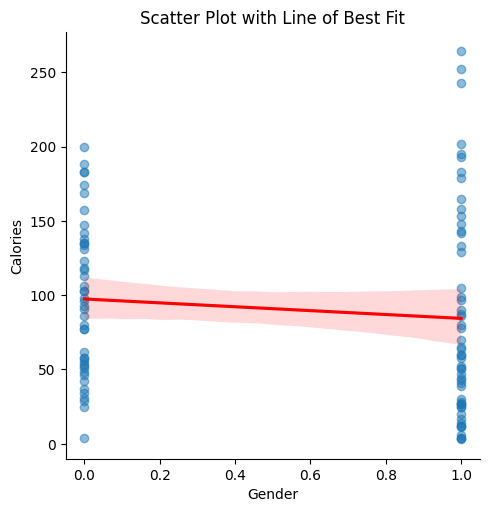

In [14]:
sample_df = calorie_train_df.sample(n=100, random_state=42)  # Change n to whatever size looks clean


sns.lmplot(x='Gender', y='Calories', data=sample_df, scatter_kws={'alpha':0.5}, line_kws={"color":"red"})

plt.title("Scatter Plot with Line of Best Fit")
plt.xlabel("Gender")
plt.ylabel("Calories")
plt.show()

In [15]:
# Check the correlation between age and calories in Train
calorie_age_corr = calorie_train_df[['Calories', 'Age']].corr()
print(calorie_age_corr)

          Calories       Age
Calories  1.000000  0.145683
Age       0.145683  1.000000


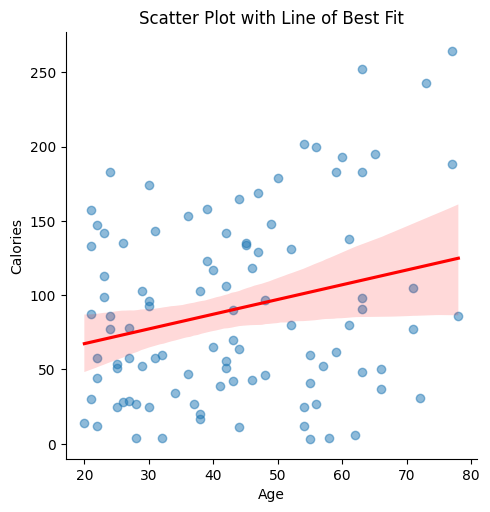

In [16]:
sns.lmplot(x='Age', y='Calories', data=sample_df, scatter_kws={'alpha':0.5}, line_kws={"color":"red"})

plt.title("Scatter Plot with Line of Best Fit")
plt.xlabel("Age")
plt.ylabel("Calories")
plt.show()

In [17]:
# Check the correlation between height and calories in Train
calorie_height_corr = calorie_train_df[['Calories', 'Height']].corr()
print(calorie_height_corr)

          Calories    Height
Calories  1.000000 -0.004026
Height   -0.004026  1.000000


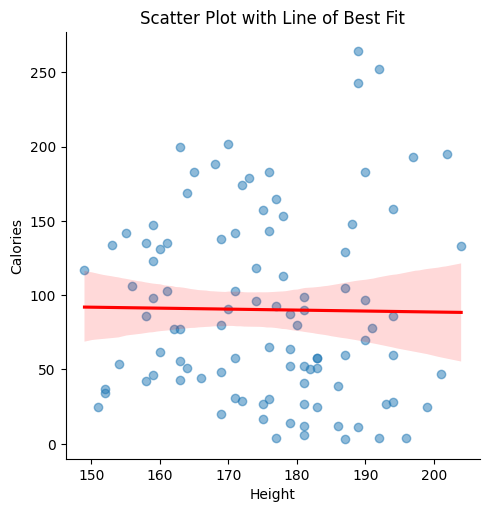

In [18]:
sns.lmplot(x='Height', y='Calories', data=sample_df, scatter_kws={'alpha':0.5}, line_kws={"color":"red"})

plt.title("Scatter Plot with Line of Best Fit")
plt.xlabel("Height")
plt.ylabel("Calories")
plt.show()

In [19]:
# Check the correlation between weight and calories in Train
calorie_weight_corr = calorie_train_df[['Calories', 'Weight']].corr()
print(calorie_weight_corr)

          Calories    Weight
Calories  1.000000  0.015863
Weight    0.015863  1.000000


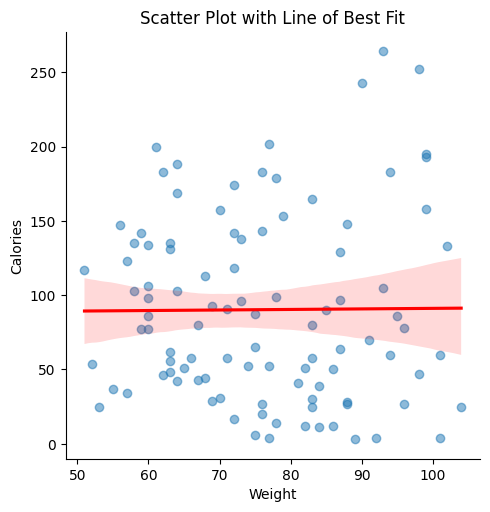

In [20]:
sns.lmplot(x='Weight', y='Calories', data=sample_df, scatter_kws={'alpha':0.5}, line_kws={"color":"red"})

plt.title("Scatter Plot with Line of Best Fit")
plt.xlabel("Weight")
plt.ylabel("Calories")
plt.show()

In [21]:
# Check the correlation between duration and calories in Train
calorie_duration_corr = calorie_train_df[['Calories', 'Duration']].corr()
print(calorie_duration_corr)

          Calories  Duration
Calories  1.000000  0.959908
Duration  0.959908  1.000000


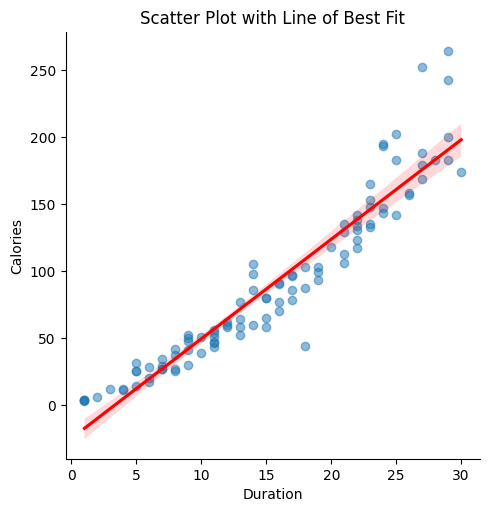

In [22]:
sns.lmplot(x='Duration', y='Calories', data=sample_df, scatter_kws={'alpha':0.5}, line_kws={"color":"red"})

plt.title("Scatter Plot with Line of Best Fit")
plt.xlabel("Duration")
plt.ylabel("Calories")
plt.show()

In [23]:
# Check the correlation between heartrate and calories in Train
calorie_heartrate_corr = calorie_train_df[['Calories', 'Heart_Rate']].corr()
print(calorie_heartrate_corr)

            Calories  Heart_Rate
Calories    1.000000    0.908748
Heart_Rate  0.908748    1.000000


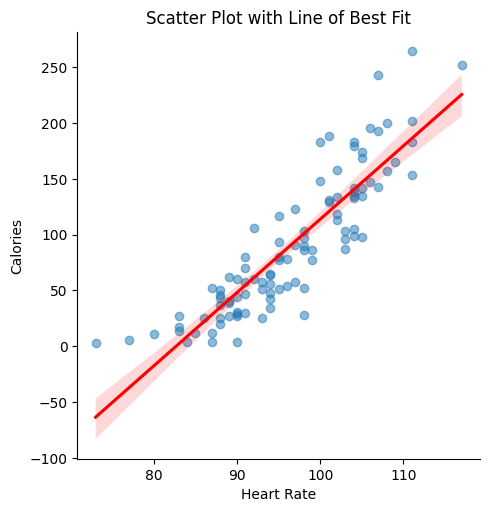

In [24]:
sns.lmplot(x='Heart_Rate', y='Calories', data=sample_df, scatter_kws={'alpha':0.5}, line_kws={"color":"red"})

plt.title("Scatter Plot with Line of Best Fit")
plt.xlabel("Heart Rate")
plt.ylabel("Calories")
plt.show()

In [25]:
# Check the correlation between Body Temp and calories in Train
calorie_bodytemp_corr = calorie_train_df[['Calories', 'Body_Temp']].corr()
print(calorie_bodytemp_corr)

           Calories  Body_Temp
Calories   1.000000   0.828671
Body_Temp  0.828671   1.000000


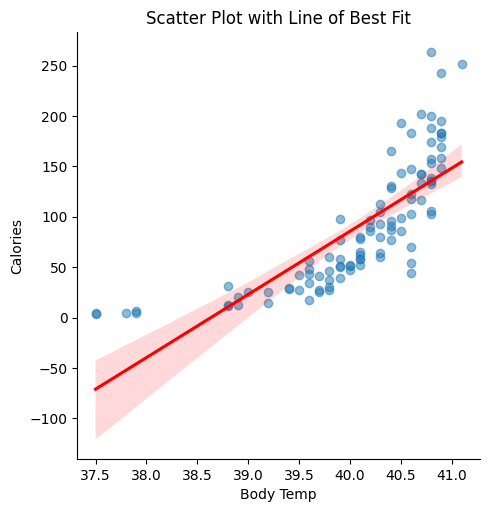

In [26]:
sns.lmplot(x='Body_Temp', y='Calories', data=sample_df, scatter_kws={'alpha':0.5}, line_kws={"color":"red"})

plt.title("Scatter Plot with Line of Best Fit")
plt.xlabel("Body Temp")
plt.ylabel("Calories")
plt.show()

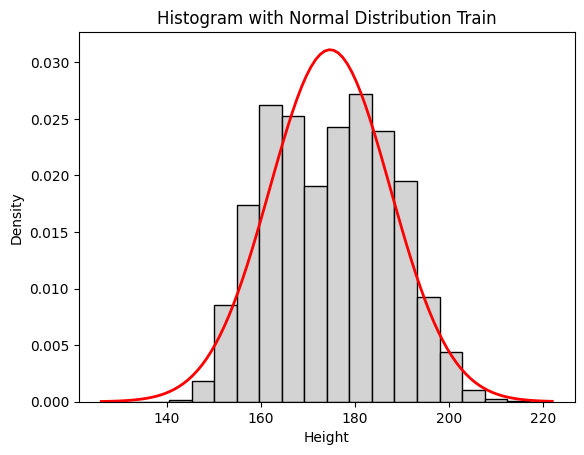

In [27]:
height_data = calorie_train_df['Height']

# Plot histogram
count, bins, ignored = plt.hist(height_data, bins=20, density=True, color='lightgray', edgecolor='black')

# Calculate mean and std dev
mu, sigma = height_data.mean(), height_data.std()

# Plot the bell curve
x = np.linspace(min(height_data), max(height_data), 100)
plt.plot(x, norm.pdf(x, mu, sigma), 'r', linewidth=2)

plt.title('Histogram with Normal Distribution Train')
plt.xlabel('Height')
plt.ylabel('Density')
plt.show()

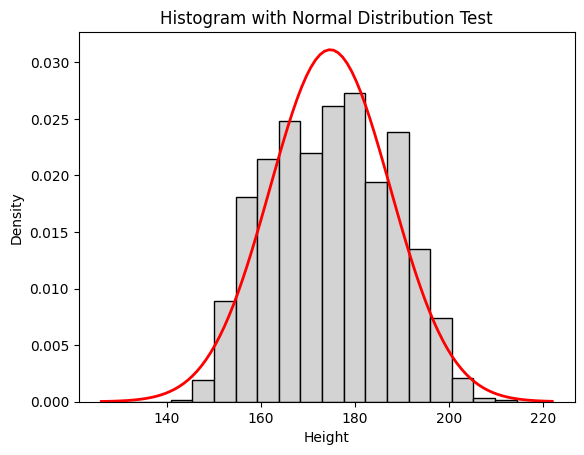

In [28]:
height_data_test = calorie_test_df['Height']

# Plot histogram
count, bins, ignored = plt.hist(height_data_test, bins=20, density=True, color='lightgray', edgecolor='black')

# Calculate mean and std dev
mu, sigma = height_data_test.mean(), height_data_test.std()

# Plot the bell curve
x_1 = np.linspace(min(height_data_test), max(height_data_test), 100)
plt.plot(x, norm.pdf(x, mu, sigma), 'r', linewidth=2)

plt.title('Histogram with Normal Distribution Test')
plt.xlabel('Height')
plt.ylabel('Density')
plt.show()

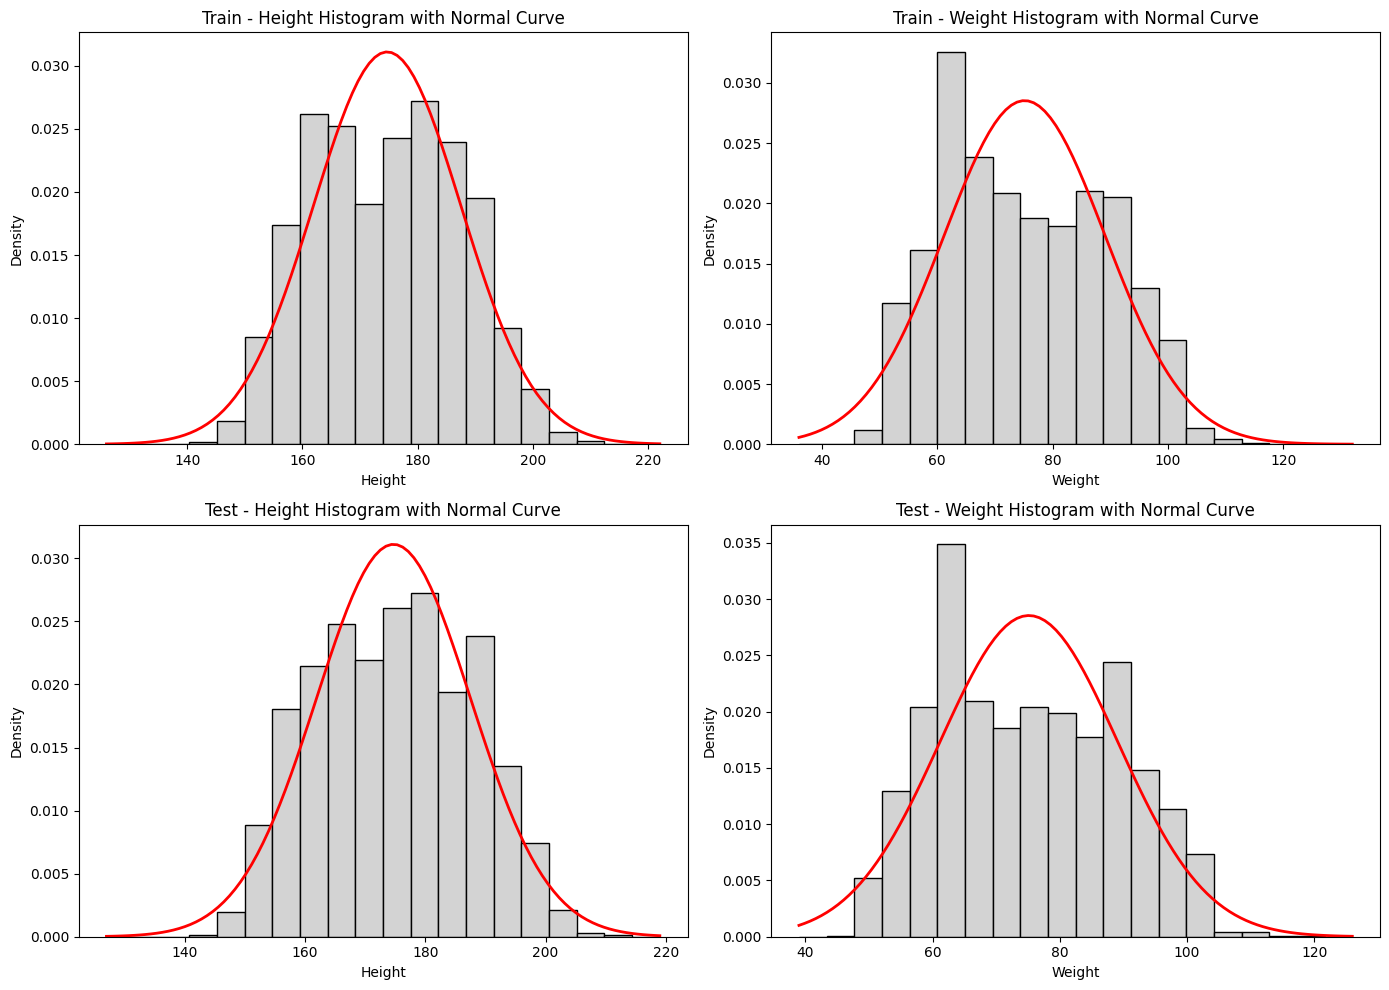

In [29]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Create 2x2 subplot grid
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# === Plot 1: Height Histogram (Train) ===
height_data = calorie_train_df['Height']
mu, sigma = height_data.mean(), height_data.std()
x = np.linspace(min(height_data), max(height_data), 100)
axs[0, 0].hist(height_data, bins=20, density=True, color='lightgray', edgecolor='black')
axs[0, 0].plot(x, norm.pdf(x, mu, sigma), 'r', linewidth=2)
axs[0, 0].set_title('Train - Height Histogram with Normal Curve')
axs[0, 0].set_xlabel('Height')
axs[0, 0].set_ylabel('Density')

# === Plot 2: Weight Histogram (Train) ===
weight_data = calorie_train_df['Weight']
mu, sigma = weight_data.mean(), weight_data.std()
x = np.linspace(min(weight_data), max(weight_data), 100)
axs[0, 1].hist(weight_data, bins=20, density=True, color='lightgray', edgecolor='black')
axs[0, 1].plot(x, norm.pdf(x, mu, sigma), 'r', linewidth=2)
axs[0, 1].set_title('Train - Weight Histogram with Normal Curve')
axs[0, 1].set_xlabel('Weight')
axs[0, 1].set_ylabel('Density')

# === Plot 3: Height Histogram (Test) ===
height_data_test = calorie_test_df['Height']
mu, sigma = height_data_test.mean(), height_data_test.std()
x = np.linspace(min(height_data_test), max(height_data_test), 100)
axs[1, 0].hist(height_data_test, bins=20, density=True, color='lightgray', edgecolor='black')
axs[1, 0].plot(x, norm.pdf(x, mu, sigma), 'r', linewidth=2)
axs[1, 0].set_title('Test - Height Histogram with Normal Curve')
axs[1, 0].set_xlabel('Height')
axs[1, 0].set_ylabel('Density')

# === Plot 4: Weight Histogram (Test) ===
weight_data_test = calorie_test_df['Weight']
mu, sigma = weight_data_test.mean(), weight_data_test.std()
x = np.linspace(min(weight_data_test), max(weight_data_test), 100)
axs[1, 1].hist(weight_data_test, bins=20, density=True, color='lightgray', edgecolor='black')
axs[1, 1].plot(x, norm.pdf(x, mu, sigma), 'r', linewidth=2)
axs[1, 1].set_title('Test - Weight Histogram with Normal Curve')
axs[1, 1].set_xlabel('Weight')
axs[1, 1].set_ylabel('Density')

# Tidy layout
plt.tight_layout()
plt.show()

## Conclusion

* Calories Burned is a continous target- therefore a regression model is the most suitable
* Linear Relationship with Calories: Age, Duration, Heart Rate, and Body_Temp
* Uncertain Relationship- Gender, Age, Height, and Weight
* +Strong Correlation: Body Temp, Heart Rate, and Duration
* +Weak Correlation- Weight, Age, and Gender
* -Weak Correlation- Height
* Since Duration of Exercise affects Heart Rate, which affects Body Heat which affects calories burnt- there is possible bias (Need to run a regression)
* From research, height and weight do affect calories burnt, but from the scatterplots, it isn't true. Moreover, histograms (with the normal distribution curve in red) for Weight in Train and Test show skewness for lowering weights. Maybe a feature is needed. 

# Data Cleaning

* Remove Duplicates
* Fill in banks

In [30]:
print (f"Rows from calorie_train_df: {calorie_train_df.shape[0]} rows")

Rows from calorie_train_df: 750000 rows


In [31]:
print (f"Rows from calorie_test_df: {calorie_test_df.shape[0]} rows")

Rows from calorie_test_df: 250000 rows


In [32]:
duplicates_calorie_train = calorie_train_df.duplicated()
duplicates_calorie_test = calorie_test_df.duplicated()

In [33]:
calorie_train_df.drop_duplicates()
print (f"After removing fully duplicated rows from calorie_train_df: {calorie_train_df.shape[0]} rows")
calorie_test_df.drop_duplicates()
print (f"After removing fully duplicated rows from calorie_test_df: {calorie_test_df.shape[0]} rows")

After removing fully duplicated rows from calorie_train_df: 750000 rows
After removing fully duplicated rows from calorie_test_df: 250000 rows


In [34]:
print(calorie_train_df.isnull().sum())

id            0
Sex           0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
Gender        0
dtype: int64


In [35]:
print(calorie_test_df.isnull().sum())

id            0
Sex           0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Gender        0
dtype: int64


## Conclusion

Data Cleaned

# Feature Engineering Beofre EDA

In [36]:
for df in [calorie_train_df, calorie_test_df]:
    df['temp_per_minute'] = df['Body_Temp'] / df['Duration']

In [37]:
# Step 1: Define age groups
def age_group(age):
    if age < 20:
        return 'Teen'
    elif age < 30:
        return 'Young Adult'
    elif age < 45:
        return 'Adult'
    elif age < 60:
        return 'Middle Aged'
    else:
        return 'Senior'

for df in [calorie_train_df, calorie_test_df]:
    df['age_group'] = df['Age'].apply(age_group)
    duration_by_age_group = df.groupby('age_group')['Duration'].mean().to_dict()
    df['Exercise_Duration_BY_Age'] = df['age_group'].map(duration_by_age_group)

for df in [calorie_train_df, calorie_test_df]:
    Age_Group_map = {'Teen': 1, 'Young Adult': 0, 'Adult': 2, 'Middle Aged': 3, 'Senior': 4}
    df['Age_Group'] = df['age_group'].map(Age_Group_map)
    df['Age_Group'] = df['age_group'].map(Age_Group_map)

In [38]:
calorie_train_df

id     Sex  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  \
0            0    male   36   189.0    82.0      26.0       101.0       41.0   
1            1  female   64   163.0    60.0       8.0        85.0       39.7   
2            2  female   51   161.0    64.0       7.0        84.0       39.8   
3            3    male   20   192.0    90.0      25.0       105.0       40.7   
4            4  female   38   166.0    61.0      25.0       102.0       40.6   
...        ...     ...  ...     ...     ...       ...         ...        ...   
749995  749995    male   28   193.0    97.0      30.0       114.0       40.9   
749996  749996  female   64   165.0    63.0      18.0        92.0       40.5   
749997  749997    male   60   162.0    67.0      29.0       113.0       40.9   
749998  749998    male   45   182.0    91.0      17.0       102.0       40.3   
749999  749999  female   39   171.0    65.0      19.0        97.0       40.6   

        Calories  Gender  temp_per_minute    age_group  \
0          150.0       1         1.576923        Adult   
1           34.0       0         4.962500       Senior   
2           29.0       0         5.685714  Middle Aged   
3          140.0       1         1.628000  Young Adult   
4          146.0       0         1.624000        Adult   
...          ...     ...              ...          ...   
749995     230.0       1         1.363333  Young Adult   
749996      96.0       0         2.250000       Senior   
749997     221.0       1         1.410345       Senior   
749998     109.0       1         2.370588  Middle Aged   
749999     103.0       0         2.136842        Adult   

        Exercise_Duration_BY_Age  Age_Group  
0                      15.548594          2  
1                      15.951226          4  
2                      15.055578          3  
3                      15.311409          0  
4                      15.548594          2  
...                          ...        ...  
749995                 15.311409          0  
749996                 15.951226          4  
749997                 15.951226          4  
749998                 15.055578          3  
749999                 15.548594          2  

[750000 rows x 14 columns]

# Exploratory Data Analysis
Dimensional Reduction and Clustering for identifying relevant features. 

## Dimensional Reduction Algorithms 
PCA and t-SNE

In [39]:
# Using PCA

# Load Dataset and Scale them

feature_columns = ['Body_Temp', 'Heart_Rate', 'Gender', 'Age', 'Duration', 
                   'temp_per_minute', 'Exercise_Duration_BY_Age','Height', 'Weight']
X = calorie_train_df[feature_columns]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y = calorie_train_df['Calories']


# Conduct PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions
X_pca = pca.fit_transform(X_scaled)

# Plot

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA Result (2D Projection)')
plt.grid(True)
plt.show()

print("Explained variance ratio:", pca.explained_variance_ratio_)

Explained variance ratio: [0.37207554 0.2985642 ]


In [40]:
# Feature loadings (contributions of each original feature to each principal component)
loadings = pd.DataFrame(pca.components_.T,
                        index=feature_columns,
                        columns=['PC1', 'PC2'])
print(loadings)

                               PC1       PC2
Body_Temp                -0.527618  0.049346
Heart_Rate               -0.485512  0.060653
Gender                    0.049106  0.547168
Age                      -0.020956  0.038357
Duration                 -0.515382  0.051737
temp_per_minute           0.457036 -0.035428
Exercise_Duration_BY_Age -0.029288  0.012927
Height                    0.064760  0.579542
Weight                    0.059110  0.594183


In [41]:
# Using t-SNE

# Select Features 
feature_columns = ['Body_Temp', 'Heart_Rate', 'Gender', 'Age', 'Duration', 
                   'temp_per_minute', 'Exercise_Duration_BY_Age', 'Height', 'Weight']
sample_df = calorie_train_df.sample(n=2000, random_state=42)
X_sample = sample_df[feature_columns]
y_sample = sample_df['Calories'] # For coloring (optional)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_sample)

# Apply t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42, n_iter=1000)
X_tsne = tsne.fit_transform(X_scaled)

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_sample, cmap='viridis', edgecolor='k')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE (Sampled)')
plt.grid(True)
plt.show()

## Clustering
HDBSCAN as it scales well with t-SNE rather than DBSCAN

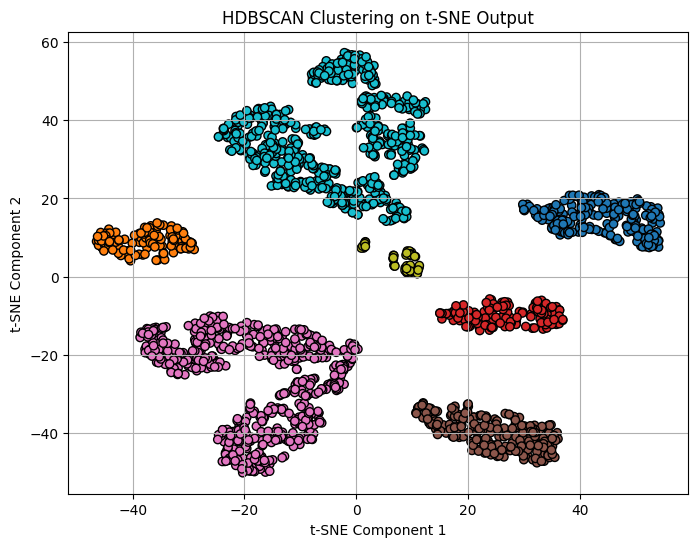

In [42]:
# We will use t-SNE from before to run HDBSCAN

# Step 1: Run HDBSCAN on 2D t-SNE output
clusterer = hdbscan.HDBSCAN(min_cluster_size=30, min_samples=10)
cluster_labels = clusterer.fit_predict(X_tsne)

# Step 2: Plot clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=cluster_labels, cmap='tab10', edgecolor='k')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('HDBSCAN Clustering on t-SNE Output')
plt.grid(True)
plt.show()

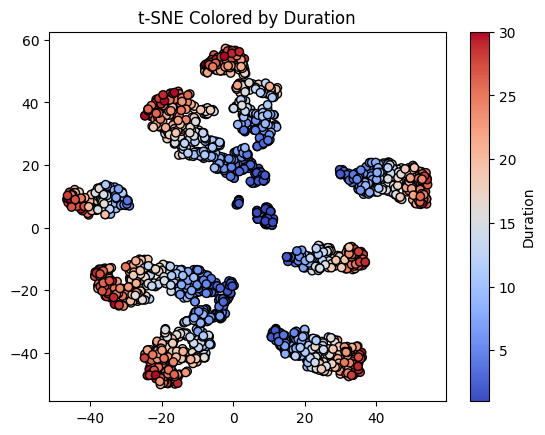

In [43]:
# Color by Duration
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=X_sample['Duration'], cmap='coolwarm', edgecolor='k')
plt.colorbar(label='Duration')
plt.title('t-SNE Colored by Duration')
plt.show()

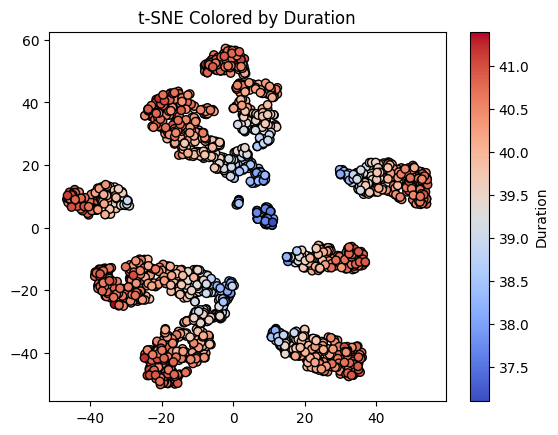

In [44]:
# Color by Body_Temp
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=X_sample['Body_Temp'], cmap='coolwarm', edgecolor='k')
plt.colorbar(label='Duration')
plt.title('t-SNE Colored by Duration')
plt.show()

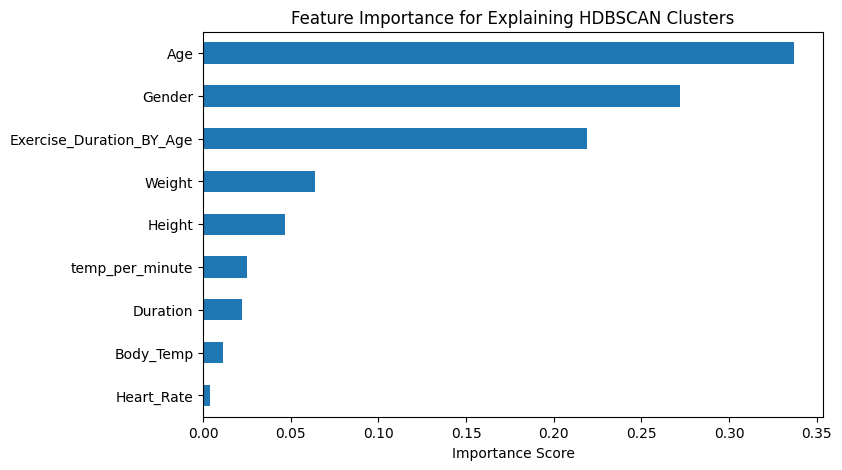

In [45]:
# Use original features to predict HDBSCAN clusters
X_input = X_sample.copy()
y_clusters = cluster_labels

# Remove noise
mask = y_clusters != -1
X_input_clean = X_input[mask]
y_clean = y_clusters[mask]

# Train Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_input_clean, y_clean)

# Get feature importances
importances = pd.Series(rf.feature_importances_, index=X_input.columns)
importances.sort_values(ascending=True).plot(kind='barh', figsize=(8, 5))
plt.title("Feature Importance for Explaining HDBSCAN Clusters")
plt.xlabel("Importance Score")
plt.show()

## Conclusion

* Gender even though not an important factor in PCA is important in Random Forest Classifier Model (when used with t-SNE + HDBSCAN).
* Gender, Exercise_Duration_By_AGE, Age, and then temp_per_minute is the ranking from Random Forest Classifier model
* I thought Body_Temp & Duration would be very significant in Random Forest Classifier- it is but not so much.
* Before DR algorithms and Clustering, Height and Weight from simple EDA techniques were seen as insignifcant- but now they explain more of the variance than Body_Temp, Heart Rate, and Duration. Therefore, **REPRIROTISE** Height and Weight in feature engineering and selection
* Create features between gender and age
* Create features for gender as well

# Feature Engineering & Selection After EDA

## New Features & Feature Selection
Lasso + Correlation Matrix

In [46]:
for df in [calorie_train_df, calorie_test_df]:
    df['Gender_Age'] = df['Gender'] * df['Age']
    df['Height_m'] = df['Height'] / 100
    df['BMI'] = df['Weight'] / (df['Height_m'] ** 2) ## Good for linear regression
    df['WtHt_Ratio'] = df['Weight'] / df['Height'] ## Works well with regression (Polynomial)
    df['Gender_Weight'] = df['Gender'] * df['Weight']
    df['BMI_Age'] = df['BMI'] * df['Age'] # Good for polynomial regression

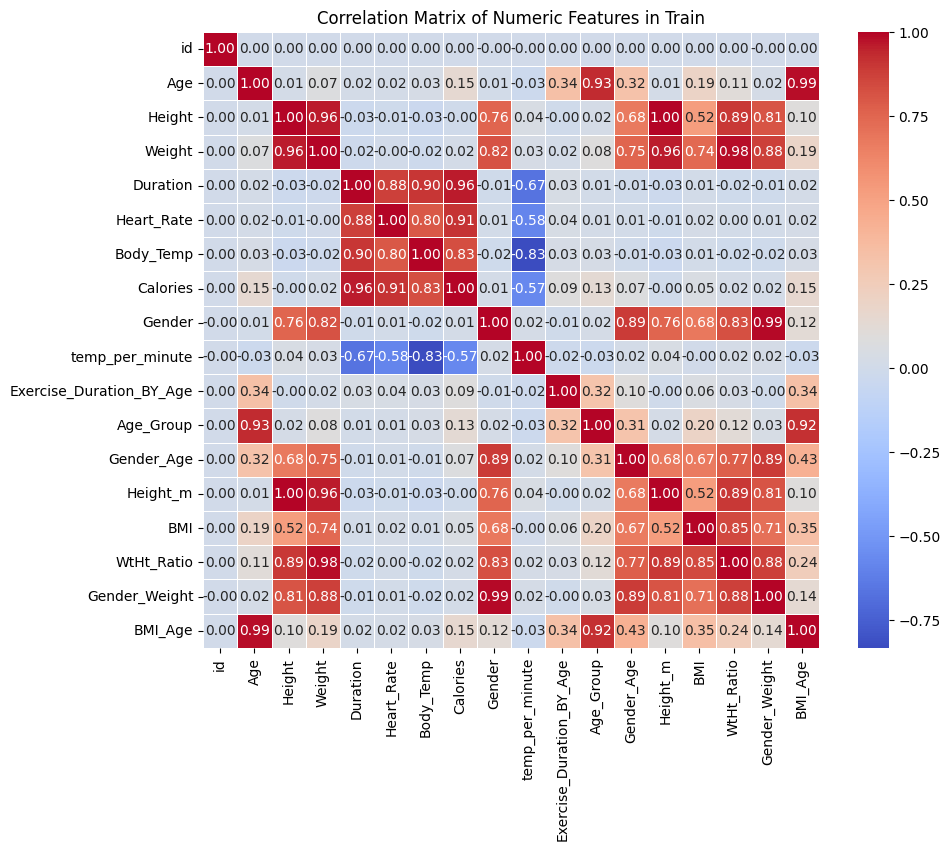

In [47]:
# Select only numeric columns
numeric_df = calorie_train_df.select_dtypes(include=['number'])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, linewidths=0.5)
plt.title('Correlation Matrix of Numeric Features in Train')
plt.show()

In [48]:
# Select only numeric columns
numeric_df_test = calorie_test_df.select_dtypes(include=['number'])

# Compute correlation matrix
corr_matrix_test = numeric_df_test.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_test, annot=True, fmt='.2f', cmap='coolwarm', square=True, linewidths=0.5)
plt.title('Correlation Matrix of Numeric Features in Test')
plt.show()

Remove temp_per_minute & Exercise_Duration_BY_Age due to low correlation coefficients. 

In [49]:
for df in [calorie_train_df, calorie_test_df]:
    columns_to_drop = ['temp_per_minute', 'Exercise_Duration_BY_Age']
    df.drop(columns=columns_to_drop, inplace=True)

In [50]:
# Use for Lasso Regression for Feature Selection
features_Lasso = ['Gender_Age', 'BMI', 'WtHt_Ratio',
                   'Gender_Weight', 'Age', 'BMI_Age', 'Gender', 'Body_Temp',
                   'Heart_Rate', 'Duration', 'Height', 'Weight']

X_Lasso = calorie_train_df[features_Lasso]
y_Lasso = calorie_train_df['Calories']

# Create Lasso model with scaling
lasso = make_pipeline(
    StandardScaler(),
    Lasso(alpha=0.05, max_iter=50000, random_state=42) # Increase the number of iterations & Alpha
)

lasso.fit(X_Lasso, y_Lasso)

model = lasso.named_steps['lasso']  # Access Lasso inside pipeline
non_zero_mask = model.coef_ != 0
selected_features = [f for f, keep in zip(features_Lasso, non_zero_mask) if keep]

print("Selected Features by Lasso:")
print(selected_features)

Selected Features by Lasso:
['Gender_Age', 'BMI', 'Gender_Weight', 'Age', 'BMI_Age', 'Gender', 'Body_Temp', 'Heart_Rate', 'Duration', 'Height']


In [51]:
# Remove non-numeric columns
for df in [calorie_train_df, calorie_test_df]:
    columns_to_drop = ['Sex','age_group']
    df.drop(columns=columns_to_drop, inplace=True)

# Models and Submission

1. Polynomial Regression + Ridge
2. XGB Regressor
3. KNN
4. CAT
5. LGBM
6. Ensemble Modle (Poly(Ridge)+XGB+CAT+LGBM). 

In [52]:
feature_columns = ['Gender_Age', 'BMI', 'Age', 'Gender_Weight', 'BMI_Age', 'Gender', 'Body_Temp',
                   'Heart_Rate', 'Duration', 'Height', 'Weight']

X = calorie_train_df[feature_columns]
y = calorie_train_df['Calories']

## Polynomial Regression + Ridge

In [53]:
X_test_ridge = calorie_test_df[feature_columns]

# Split for train and validation
X_train_ridge, X_val_ridge, y_train_ridge, y_val_ridge = train_test_split(X, y, test_size=0.2, random_state=42)

# Create pipeline: Polynomial + Ridge Regression
model_ridge = make_pipeline(
    StandardScaler(),
    PolynomialFeatures(degree=3, include_bias=False),
    Ridge(alpha=1)
)

# Train
model_ridge.fit(X_train_ridge, y_train_ridge)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('polynomialfeatures',
                 PolynomialFeatures(degree=3, include_bias=False)),
                ('ridge', Ridge(alpha=1))])

In [54]:
# Predict on validation set
y_pred = model_ridge.predict(X_val_ridge)
y_pred = np.maximum(0, y_pred)

# Compute RMSLE
rmsle = np.sqrt(mean_squared_log_error(y_val_ridge, y_pred))
print(f"Ridge Regression RMSLE (validation): {rmsle:.5f}")

Ridge Regression RMSLE (validation): 0.06728


In [55]:
# Predict on Test Data 
test_predictions_ridge = model_ridge.predict(X_test_ridge)
test_predictions_ridge = np.maximum(0, test_predictions_ridge)

## XGB Regressor

In [56]:

X_test_XGB = calorie_test_df[feature_columns]

# 2. Train-validation split
X_train_XGB, X_val_XGB, y_train_XGB, y_val_XGB = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Initialize and train XGBRegressor
xgb_model = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    random_state=42,
    n_jobs=-1
)
xgb_model.fit(X_train_XGB, y_train_XGB)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=-1,
             num_parallel_tree=None, random_state=42, ...)

In [57]:
# Predict and evaluate
y_pred = xgb_model.predict(X_val_XGB)
y_pred = np.maximum(0, y_pred)  # RMSLE-safe

rmsle = np.sqrt(mean_squared_log_error(y_val_XGB, y_pred))
print(f"XGBRegressor RMSLE (validation): {rmsle:.5f}")

XGBRegressor RMSLE (validation): 0.06738


In [58]:
# Predict on Test
test_predictions_xgb = xgb_model.predict(X_test_XGB)
test_predictions_xgb = np.maximum(0, test_predictions_xgb)

## CAT

In [59]:
X_test_CAT = calorie_test_df[feature_columns]

# 2. Train-validation split
X_train_CAT, X_val_CAT, y_train_CAT, y_val_CAT = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Identify categorical features by index (CatBoost needs column indexes)
cat_features = [X.columns.get_loc('Gender')]  # assuming only 'Gender' is categorical

# 4. Initialize and train CAT
model_cat = CatBoostRegressor(
    iterations=500,
    learning_rate=0.05,
    depth=6,
    random_state=42,
    verbose=0
)

# 5. Train
model_cat.fit(X_train_CAT, y_train_CAT, cat_features=cat_features, eval_set=(X_val_CAT, y_val_CAT))

In [60]:
# Predict and evaluate
y_pred = model_cat.predict(X_val_CAT)
y_pred = np.maximum(0, y_pred)  # RMSLE-safe

rmsle = np.sqrt(mean_squared_log_error(y_val_CAT, y_pred))
print(f"XGBRegressor RMSLE (validation): {rmsle:.5f}")

XGBRegressor RMSLE (validation): 0.06498


## LGBM

In [61]:
X_test_LGBM =  calorie_test_df[feature_columns]

# 2. Train-validation split
X_train_LGBM, X_val_LGBM, y_train_LGBM, y_val_LGBM = train_test_split(X, y, test_size=0.2, random_state=42)

#. 3 LGBM Model
model_lgbm = LGBMRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    random_state=42
)

# 4. Train
model_lgbm.fit(X_train_LGBM, y_train_LGBM)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014832 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1006
[LightGBM] [Info] Number of data points in the train set: 600000, number of used features: 11
[LightGBM] [Info] Start training from score 88.298465
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

LGBMRegressor(learning_rate=0.05, max_depth=6, n_estimators=500,
              random_state=42)

In [62]:
# Predict and evaluate
y_pred = model_lgbm.predict(X_val_CAT)
y_pred = np.maximum(0, y_pred)  # RMSLE-safe

rmsle = np.sqrt(mean_squared_log_error(y_val_LGBM, y_pred))
print(f"XGBRegressor RMSLE (validation): {rmsle:.5f}")

XGBRegressor RMSLE (validation): 0.06324


## Gradient Booster

In [63]:
X_test_GB = calorie_test_df[feature_columns]

# Train-validation split
X_train_GB, X_val_GB, y_train_GB, y_val_GB = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_GB = scaler.fit_transform(X_train_GB)
X_val_GB = scaler.transform(X_val_GB)

# Initialize Gradient Boosting Regressor
model_gbr = GradientBoostingRegressor(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    random_state=42
)

# Train the model
model_gbr.fit(X_train_GB, y_train_GB)

GradientBoostingRegressor(learning_rate=0.05, max_depth=6, n_estimators=200,
                          random_state=42, subsample=0.8)

In [64]:
# Predict and evaluate
y_pred = model_gbr.predict(X_val_GB)
y_pred = np.maximum(0, y_pred)  # RMSLE-safe

rmsle = np.sqrt(mean_squared_log_error(y_val_GB, y_pred))
print(f"XGBRegressor RMSLE (validation): {rmsle:.5f}")

XGBRegressor RMSLE (validation): 0.06858


## Ensemble Model

In [65]:
X_test_stacked = calorie_test_df[feature_columns]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define base models
poly_ridge = make_pipeline(
    StandardScaler(),
    PolynomialFeatures(degree=3, include_bias=False),
    Ridge(alpha=0.05)
)

xgb = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    random_state=42,
    n_jobs=-1
)

cat = CatBoostRegressor(
    iterations=1000,
    learning_rate=0.05,
    depth=6,
    random_state=42,
    verbose=0
)

LGBM = LGBMRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    random_state=42
)

GBR = GradientBoostingRegressor(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    random_state=42
)

# Stacked Model
stacked_model = StackingRegressor(
    estimators=[('poly_ridge', poly_ridge),
        ('xgb', xgb), 
        ('LGBM', LGBM), 
        ('cat', cat),
        ('GBR', GBR)
    ],
    final_estimator=RidgeCV(),  # or Ridge(alpha=1.0)
    cv=5,
    n_jobs=-1
)

# Log the target variable- Calories
y_train_log = np.log1p(y_train)

# Fit stacked model
stacked_model.fit(X_train, y_train_log)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.170538 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1006
[LightGBM] [Info] Number of data points in the train set: 600000, number of used features: 11
[LightGBM] [Info] Start training from score 4.141163
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

StackingRegressor(cv=5,
                  estimators=[('poly_ridge',
                               Pipeline(steps=[('standardscaler',
                                                StandardScaler()),
                                               ('polynomialfeatures',
                                                PolynomialFeatures(degree=3,
                                                                   include_bias=False)),
                                               ('ridge', Ridge(alpha=0.05))])),
                              ('xgb',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            earl...
                                            n_estimators=100, n_jobs=-1,
                                            num_parallel_tree=None,
                                            random_state=42, ...)),
                              ('LGBM',
                               LGBMRegressor(learning_rate=0.05, max_depth=6,
                                             n_estimators=500,
                                             random_state=42)),
                              ('cat',
                               <catboost.core.CatBoostRegressor object at 0x7a2906b8b190>),
                              ('GBR',
                               GradientBoostingRegressor(learning_rate=0.05,
                                                         max_depth=6,
                                                         n_estimators=200,
                                                         random_state=42,
                                                         subsample=0.8))],
                  final_estimator=RidgeCV(), n_jobs=-1)

In [66]:
y_pred_log = stacked_model.predict(X_val)
y_pred = np.expm1(y_pred_log) 

rmsle = np.sqrt(mean_squared_log_error(y_val, y_pred))
print(f"Stacked Model RMSLE (validation): {rmsle:.5f}")

Stacked Model RMSLE (validation): 0.05942


In [67]:
test_predictions_stacked_log = stacked_model.predict(X_test_stacked)
test_predictions_stacked = np.expm1(test_predictions_stacked_log)

## Submission

In [68]:
# Add DT predictions to test DataFrame
calorie_test_df['Calories_Predicted'] = test_predictions_stacked

submission = calorie_test_df[['id', 'Calories_Predicted']]

submission.to_csv('submission.csv', index=False)
print("Submission file saved successfully!")

Submission file saved successfully!
